In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [21]:
x = 2
y = 2
nx = 81
my = 81
dx = x/(nx-1)
dy = y/(my-1)
print(dx,dy)
xarr = np.linspace(0,x,nx)
yarr = np.linspace(0,y,my)
print(xarr,yarr)

nt=2000
nu=0.3                              #diffusion parameter (viscosity)
sigma=0.2
dt=sigma*dx**2/nu

c=1

0.025 0.025
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475
 1.5   1.525 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775
 1.8   1.825 1.85  1.875 1.9   1.925 1.95  1.975 2.   ] [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025 1.05  1.075 1.1   1.125 1.15  1.175
 1.2   1.225 1.25  1.275 1.3   1.325 1.35  1.375 1.4   1.425 1.45  1.475
 1.5   1.525 1.55  1.575 1.6   1.625 1.65  1.675 1.7   1.725 1.75  1.775
 1.8   1.825 1.85  1.875 1.9   1.925 1.95  1.975 2.   ]


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


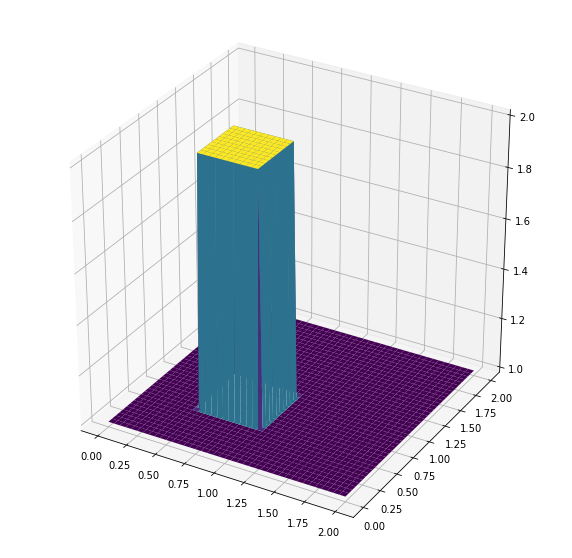

In [22]:
u=np.ones((nx,my))
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
print(u)

#Plotting the initial figure
fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(xarr,yarr)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 1.05093233 1.04026371 1.        ]
 [1.         1.         1.         ... 1.04026371 1.03181909 1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


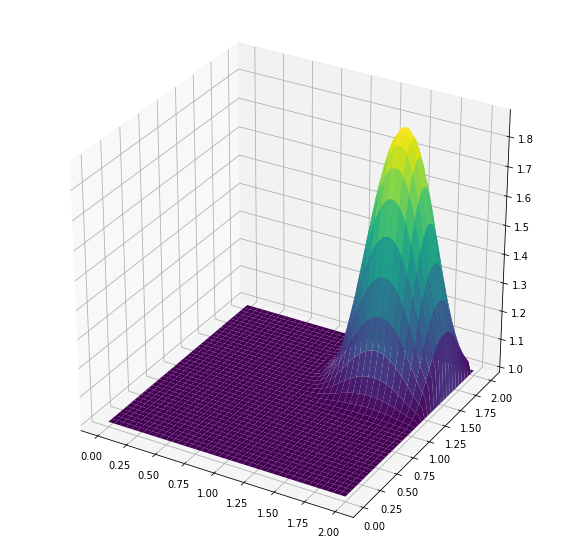

In [23]:
#Computing using for-loop

def numerical(m, nt):
    for it in range(nt):
        un=m.copy()
        for i in range(1,nx):
            for j in range(1, my):
                m[i,j] = un[i,j] - c*dt/dx*(un[i,j] - un[i-1,j]) - c*dt/dy*(un[i,j] - un[i,j-1])
            m[0, :] = 1
            m[-1, :] = 1
            m[:, 0] = 1
            m[:, -1] = 1
    return m

comp = numerical(u, nt)
print(comp)

fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, comp[:], cmap=cm.viridis)

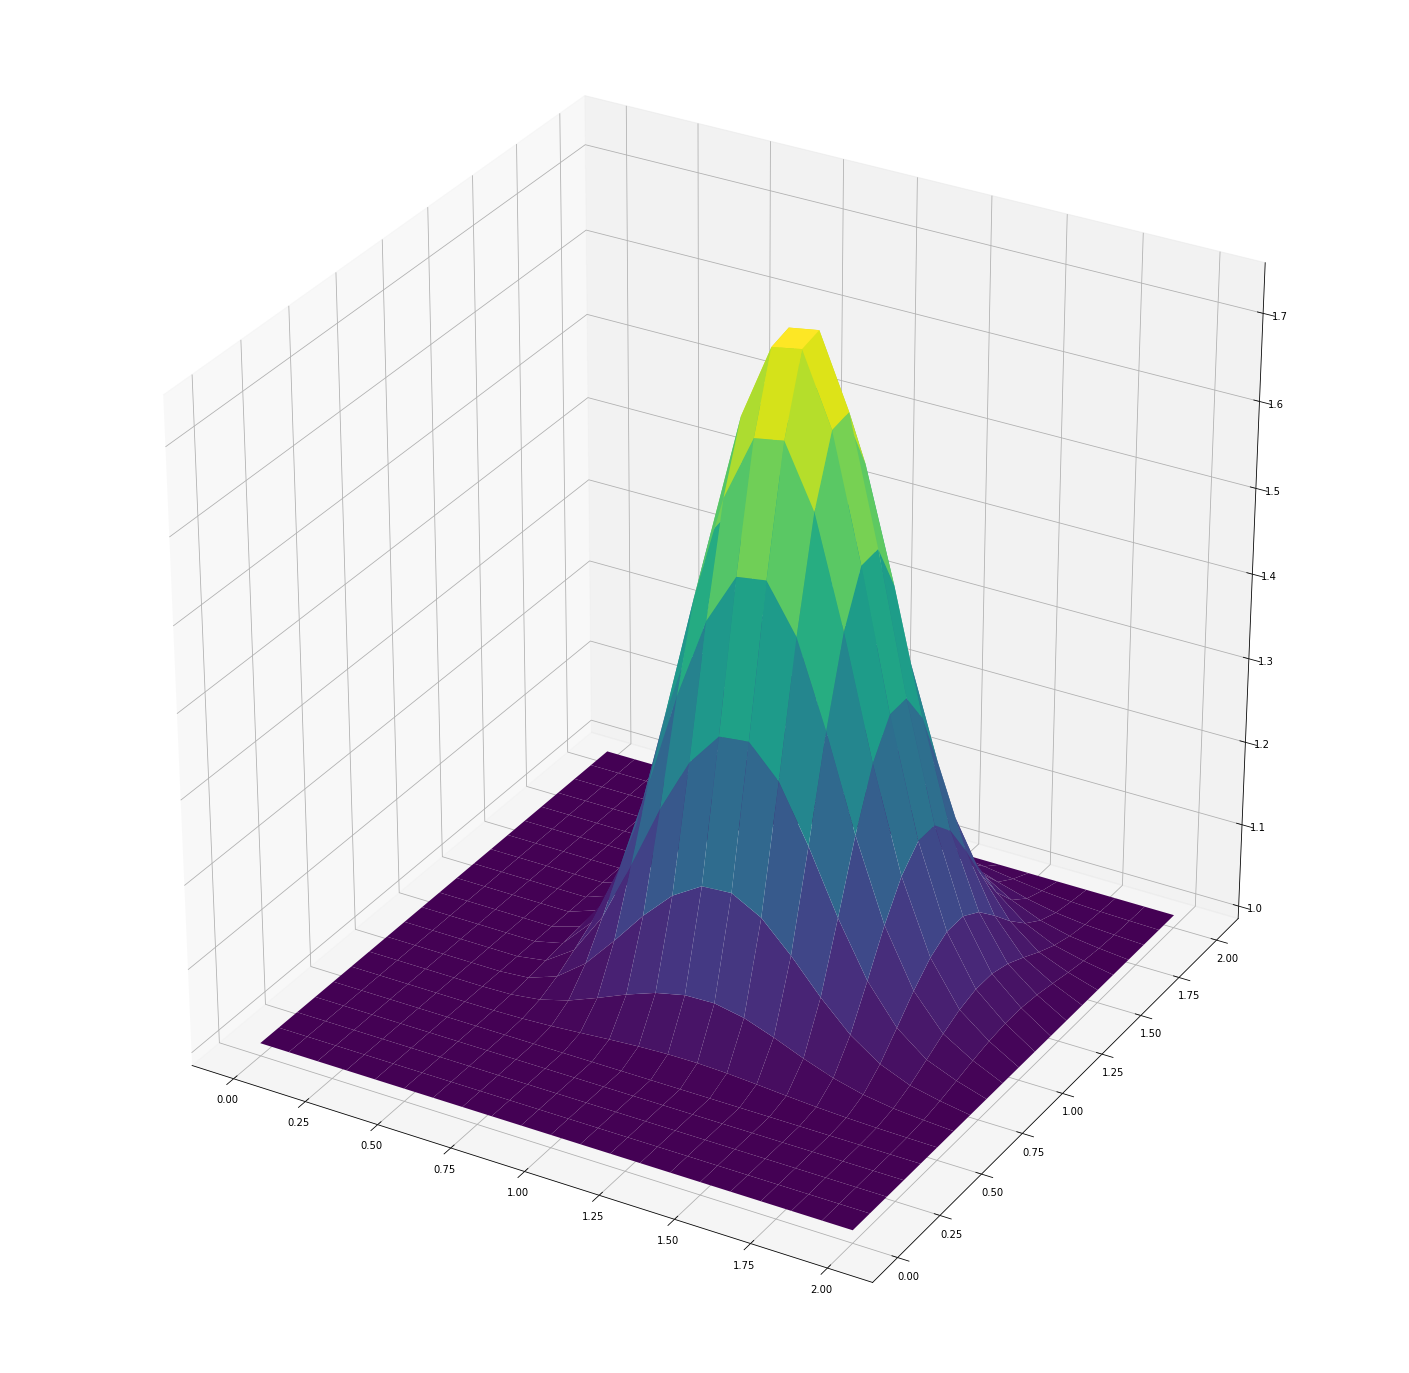

In [22]:
#Computing using array operations
def Numerics_Array(un):
    for it in range(nt):
        un[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[:-1, 1:])) - (c * dt / dy * (un[1:, 1:] - un[1:, :-1])))
        un[0, :] = 1
        un[-1, :] = 1
        un[:, 0] = 1
        un[:, -1] = 1
    return un

u_final_array = Numerics_Array(u)
fig = plt.figure(figsize = (25,25))
ax = fig.gca(projection='3d')
surf3 = ax.plot_surface(X, Y, u_final_array[:], cmap=cm.viridis)